In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Subclass

class Model_sub(keras.Model):
    def __init__(self, hidden, dropout, outputs):
        super(Model_sub,self).__init__()
        self.hidden1 = keras.layers.Dense(hidden, 'relu')
        self.dropout = keras.layers.Dropout(dropout)
        self.outputs = keras.layers.Dense(outputs, 'sigmoid')
        
    def call(self, inputs):
        x = self.hidden1(inputs)
        x = self.dropout(x)
        x = self.outputs(x)
        
        return x
    
model_sub = Model_sub(64, 0.3, 1)

In [6]:
## Tokenizer
## Sentimental analysis
samples = np.array(['너 오늘 이뻐 보인다',
          '나는 오늘 기분이 더러워',
          '끝내주는데, 좋은 일이 있나봐',
          '나 좋은 일이 생겼어',
          '아 오늘 진짜 짜증나',
          '환상적인데, 정말 좋은거 같아'])
targets = np.array([[1], [0], [1], [1], [0], [1]])

In [11]:
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
display(sequences)
display(tokenizer.word_index)

[[4, 1, 5, 6],
 [7, 1, 8, 9],
 [10, 2, 3, 11],
 [12, 2, 3, 13],
 [14, 1, 15, 16],
 [17, 18, 19, 20]]

{'오늘': 1,
 '좋은': 2,
 '일이': 3,
 '너': 4,
 '이뻐': 5,
 '보인다': 6,
 '나는': 7,
 '기분이': 8,
 '더러워': 9,
 '끝내주는데': 10,
 '있나봐': 11,
 '나': 12,
 '생겼어': 13,
 '아': 14,
 '진짜': 15,
 '짜증나': 16,
 '환상적인데': 17,
 '정말': 18,
 '좋은거': 19,
 '같아': 20}

In [13]:
batch_size = 2
epochs = 100
vocal_size = len(tokenizer.word_index) + 1
emb_size = 128
hidden = 64
outputs = 1


class Sentimental_analysis(keras.Model):
    def __init__(self, vocal_size,  emb_size, hidden, outputs):
        super(Sentimental_analysis, self).__init__()
        self.emb = keras.layers.Embedding(vocal_size, emb_size)
        self.dense = keras.layers.Dense(hidden, 'relu')
        self.outputs = keras.layers.Dense(outputs, 'sigmoid')
        
        
    def call(self, inputs):
        x = self.emb(x)
        x = tf.reduce_mean(x, axis = 1)
        x = self.dense(x)
        x = self.outputs(x)
        
        return x
    
    
sentimental_analysis = Sentimental_analysis(vocal_size, emb_size, hidden, outputs)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [15]:
text_data = ['나는 배가 고프다', 
             '내일 점심 뭐먹지', 
             '내일 공부 해야겠다', 
             '점심 먹고 공부 해야지']

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(text_data)
tfidf_vectors = tfidf_vectorizer.transform(text_data)
tfidf_vectors.toarray()

array([[0.57735027, 0.        , 0.57735027, 0.        , 0.        ,
        0.        , 0.57735027, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.52640543, 0.        ,
        0.66767854, 0.        , 0.52640543, 0.        , 0.        ],
       [0.        , 0.52640543, 0.        , 0.52640543, 0.        ,
        0.        , 0.        , 0.        , 0.66767854, 0.        ],
       [0.        , 0.43779123, 0.        , 0.        , 0.55528266,
        0.        , 0.        , 0.43779123, 0.        , 0.55528266]])

In [16]:
## tokenizer
from nltk.tokenize import word_tokenize, sent_tokenize

In [18]:
sentence = "Natural language processing (NLP) is a subfield of computer science, \
information engineering, and artificial intelligence concerned \
with the interactions between computers and human (natural) languages, \
in particular how to program computers to process and analyze \
large amounts of natural language data."

nltk_word = word_tokenize(sentence)
print(nltk_word)

['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'computer', 'science', ',', 'information', 'engineering', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.']


In [20]:
from konlpy.tag import Okt

In [21]:
okt = Okt()

In [23]:
text = "한글 자연어 처리는 재밌다 이제부터 열심히 해야ㅎㅎㅎ"

print(okt.nouns(text))
print(okt.morphs(text))
print(okt.phrases(text))
print(okt.pos(text))

['한글', '자연어', '처리', '이제']
['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '해야', 'ㅎㅎㅎ']
['한글', '한글 자연어', '한글 자연어 처리', '이제', '자연어', '처리']
[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재밌다', 'Adjective'), ('이제', 'Noun'), ('부터', 'Josa'), ('열심히', 'Adverb'), ('해야', 'Verb'), ('ㅎㅎㅎ', 'KoreanParticle')]


In [24]:
## Count -based vectorizer

A = np.array([[0,0,0,1,0,1,1,0,0],
              [0,0,0,1,1,0,1,0,0],
              [0,1,1,0,2,0,0,0,0],
              [1,0,0,0,0,0,0,1,1]])

A.shape

(4, 9)

In [31]:
U, s, VT = np.linalg.svd(A, full_matrices = True)

print('U:')
print(U.round(3))

print('s:')
print(s)

print('VT:')
print(VT.round(3))


U:
[[-0.24   0.751  0.    -0.615]
 [-0.506  0.444 -0.     0.739]
 [-0.828 -0.489 -0.    -0.274]
 [-0.    -0.     1.     0.   ]]
s:
[2.68731789 2.04508425 1.73205081 0.77197992]
VT:
[[-0.    -0.308 -0.308 -0.278 -0.805 -0.089 -0.278 -0.    -0.   ]
 [ 0.    -0.239 -0.239  0.584 -0.261  0.367  0.584 -0.    -0.   ]
 [ 0.577 -0.     0.     0.    -0.     0.    -0.     0.577  0.577]
 [ 0.    -0.354 -0.354  0.161  0.249 -0.797  0.161 -0.    -0.   ]
 [-0.    -0.779 -0.013 -0.198  0.396  0.396 -0.198  0.     0.   ]
 [-0.289  0.312 -0.781 -0.242  0.234  0.234  0.008  0.144  0.144]
 [-0.289 -0.104  0.26  -0.586 -0.078 -0.078  0.664  0.144  0.144]
 [-0.5   -0.06   0.15   0.239 -0.045 -0.045 -0.194  0.75  -0.25 ]
 [-0.5   -0.06   0.15   0.239 -0.045 -0.045 -0.194 -0.25   0.75 ]]


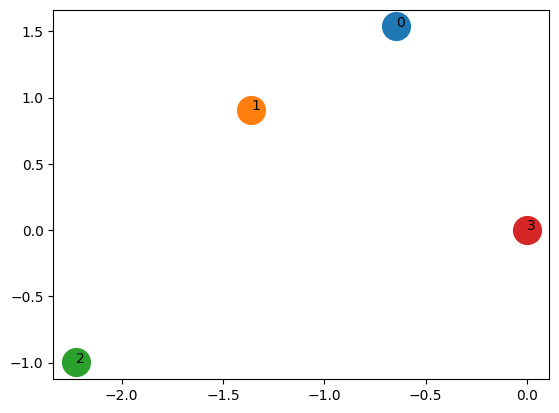

In [39]:
svd_matrix = np.hstack([U[:, 0:1]*s[0], U[:, 1:2]*s[1]])

for i in range(4):
    plt.plot(svd_matrix[i, 0], svd_matrix[i, 1], 'o', markersize = 20)
    plt.text(svd_matrix[i, 0], svd_matrix[i, 1], i)

plt.show()

In [21]:
sent = ("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", 
        "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.")

In [22]:
def jaccard_sim(x):
    union_vec = sum(x[0] == x[1])
    jaccard_value = union_vec/x.shape[1]
    return jaccard_value.round(4)

In [25]:
countVectorizer = CountVectorizer()
countVectorizer.fit(sent)
print(countVectorizer.vocabulary_)
count_vec = countVectorizer.transform(sent)
count_vect = count_vec.toarray()

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(sent)
tfidf_vec = tfidf_vectorizer.transform(sent)
tfidf_vect = tfidf_vec.toarray()
print(tfidf_vect)

{'휴일': 16, '오늘': 7, '서쪽': 5, '중심': 12, '으로': 8, '폭염': 13, '이어졌는데요': 9, '내일': 1, '반가운': 4, '소식': 6, '있습니다': 11, '피해서': 14, '놀러왔다가': 2, '갑작스런': 0, '인해': 10, '망연자실': 3, '하고': 15}
[[0.         0.32412345 0.         0.         0.32412345 0.32412345
  0.32412345 0.32412345 0.32412345 0.32412345 0.         0.2306165
  0.32412345 0.2306165  0.         0.         0.2306165 ]
 [0.36469323 0.         0.36469323 0.36469323 0.         0.
  0.         0.         0.         0.         0.36469323 0.25948224
  0.         0.25948224 0.36469323 0.36469323 0.25948224]]


In [26]:
jaccard_score = jaccard_sim(count_vect)
print(jaccard_score)

jaccard_score_tfidf = jaccard_sim(tfidf_vect)
print(jaccard_score_tfidf)

0.1765
0.0


In [30]:
count_vect

array([[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1],
       [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1]], dtype=int64)

In [39]:
## Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances

In [33]:
count_vect[0]
count_vect[0:1]


array([[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1]], dtype=int64)

In [42]:
## count vector
cos_dis_count = cosine_distances(count_vect[0:1], count_vect[1:2])
print('cos distance, count_vect', cos_dis_count)
## tfidf vector
cos_dis_tfidf = cosine_distances(tfidf_vect[0:1], tfidf_vect[1:2])
print('cos distance, tfidfvect', cos_dis_tfidf)

cos distance, count_vect [[0.69848866]]
cos distance, tfidfvect [[0.82047734]]


In [43]:
## count vector
cos_dis_count = cosine_similarity(count_vect[0:1], count_vect[1:2])
print('cos distance, count_vect', cos_dis_count)
## tfidf vector
cos_dis_tfidf = cosine_similarity(tfidf_vect[0:1], tfidf_vect[1:2])
print('cos distance, tfidfvect', cos_dis_tfidf)

cos distance, count_vect [[0.30151134]]
cos distance, tfidfvect [[0.17952266]]


In [37]:
## count vector
eucl_dis_count = euclidean_distances(count_vect[0:1], count_vect[1:2])
print('eucl_ distance, count_vect', eucl_dis_count)
## tfidf vector
eucl__dis_tfidf = euclidean_distances(tfidf_vect[0:1], tfidf_vect[1:2])
print('eucl_ distance, tfidfvect', eucl__dis_tfidf)

eucl_ distance, count_vect [[3.74165739]]
eucl_ distance, tfidfvect [[1.28099753]]


In [ ]:
## count vector
manhattan_dis_count = manhattan_distances(count_vect[0:1], count_vect[1:2])
print('eucl_ distance, count_vect', manhattan_dis_count)
## tfidf vector
manhattan_dis_tfidf = manhattan_distances(tfidf_vect[0:1], tfidf_vect[1:2])
print('eucl_ distance, tfidfvect', manhattan_dis_tfidf)

In [44]:
data_set = tf.keras.utils.get_file(
    fname = 'imdb.tar.gz',
    origin = 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz',
    extract = True
)

84125825/84125825 [==============================] - 13s 0us/step


In [51]:
import os
import glob

In [50]:
os.path.dirname('./datasets/aclImdb/')
os.path.join(os.path.dirname('./datasets/aclImdb/'), 'train', 'pos')

'./datasets/aclImdb\\train\\pos'

In [57]:
folder_path = os.path.dirname('./datasets/aclImdb/')
tt_lists = ['train', 'test']
pn_lists = ['pos', 'neg']

# file_paths = []
data = {}
for i in tt_lists:
    for j in pn_lists:
        file_paths = glob.glob(os.path.join(folder_path, i, j, "*.*"))
        
        data[i+"_"+j] = []
        
        for k in file_paths:
            with open(k, 'rt', encoding = 'utf-8') as f:
                data[i+"_"+j].append(f.read())

In [62]:
import pandas as pd

In [75]:
# print(type(data['train_pos']))

data_train_pos = pd.DataFrame(data['train_pos'], columns=['review'])
data_train_pos['sentiment'] = 1
data_train_pos.head()

data_train_neg = pd.DataFrame(data['train_neg'], columns=['review'])
data_train_neg['sentiment'] = 0
data_train_neg.head()

train_df = pd.concat([data_train_pos, data_train_neg], ignore_index=True)
train_df.shape
train_df.head()
train_df.tail()

,review,sentiment
24995,"Towards the end of the movie, I felt it was to...",0
24996,This is the kind of movie that my enemies cont...,0
24997,I saw 'Descent' last night at the Stockholm Fi...,0
24998,Some films that you pick up for a pound turn o...,0
24999,"This is one of the dumbest films, I've ever se...",0


In [72]:
##
train_df.head()

,reivew,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [78]:
review = train_df['review']
# print(type(review))
review[0]
review[1]

'Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going to school, work, or vote for the matter. Most people think of the homeless as just a lost cause while worrying about things such as racism, the war on Iraq, pressuring kids to succeed, technology, the elections, inflation, or worrying if they\'ll be next to end up on the streets.<br /><br />But what if you were given a bet to live on the streets for a month without the luxuries you once had from a home, the entertainment sets, a bathroom, pictures on the wall, a computer, and everything you once treasure to see what it\'s like to be homeless? That is Goddard Bolt\'s lesson.<br /><br />Mel Brooks (who directs) who stars as Bolt plays a rich man who has everything in the world until deciding to make a bet with a sissy rival (Jeffery Tambor) to see if he can live in the streets for thirty days withou

In [84]:
tokenized_review = [len(x.split()) for x in review]
print('단어갯수:', tokenized_review)
eumjeol_review = [len(x.replace(" ", "")) for x in review]
print('음절갯수:',eumjeol_review)

단어갯수: [140, 428, 147, 124, 120, 171, 108, 340, 436, 324, 280, 86, 282, 224, 145, 158, 195, 279, 129, 152, 214, 556, 168, 179, 141, 104, 109, 310, 150, 142, 244, 119, 159, 165, 437, 453, 54, 298, 221, 331, 356, 160, 527, 242, 112, 331, 966, 544, 87, 1839, 436, 541, 182, 539, 202, 715, 180, 162, 54, 278, 93, 181, 133, 216, 316, 165, 103, 223, 106, 96, 124, 194, 291, 322, 44, 148, 107, 326, 71, 224, 115, 262, 111, 117, 55, 56, 268, 129, 169, 159, 249, 76, 196, 119, 164, 55, 63, 101, 137, 166, 168, 216, 114, 160, 588, 159, 272, 242, 146, 507, 225, 337, 193, 54, 163, 116, 274, 395, 272, 354, 187, 104, 222, 197, 140, 221, 512, 159, 112, 110, 157, 142, 221, 145, 323, 171, 143, 211, 629, 237, 319, 199, 341, 135, 303, 103, 130, 160, 121, 649, 141, 172, 414, 299, 498, 329, 392, 153, 153, 185, 185, 133, 136, 295, 499, 90, 391, 333, 154, 149, 95, 148, 145, 173, 74, 110, 124, 133, 114, 390, 145, 123, 137, 147, 157, 220, 129, 133, 132, 147, 200, 135, 457, 273, 161, 421, 401, 161, 155, 150, 267, 183,

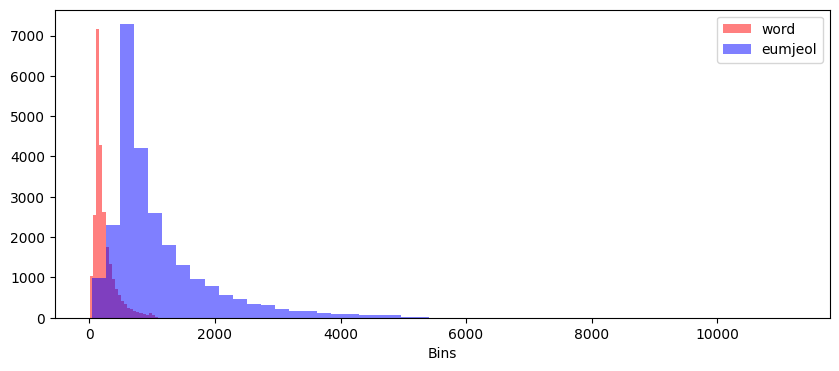

In [85]:
plt.figure(figsize = (10, 4))

plt.hist(tokenized_review, bins = 50, color = 'r', alpha = 0.5, label = 'word')
plt.hist(eumjeol_review, bins = 50, color = 'b', alpha = 0.5, label = 'eumjeol')
plt.xlabel('Bins')
plt.legend()
plt.show()

In [91]:
## EDA
def summary_token_len(x):
    print('문장 최대 길이: {}'.format(np.max(x)))
    print('문장 최소 길이: {}'.format(np.min(x)))
    print('문장 평균 길이: {}'.format(np.mean(x)))
    print('문장 표준편차 길이: {}'.format(np.std(x)))
    print('문장 중앙값 길이: {}'.format(np.median(x)))
    print('문장 1사분위수 길이: {}'.format(np.quantile(x, 0.25)))
    print('문장 3사분위수 길이: {}'.format(np.quantile(x, 0.75)))
    
summary_token_len(tokenized_review)

문장 최대 길이: 2470
문장 최소 길이: 10
문장 평균 길이: 233.7872
문장 표준편차 길이: 173.72955740506566
문장 중앙값 길이: 174.0
문장 1사분위수 길이: 127.0
문장 3사분위수 길이: 284.0


In [92]:
summary_token_len(eumjeol_review)

문장 최대 길이: 11235
문장 최소 길이: 43
문장 평균 길이: 1092.29292
문장 표준편차 길이: 830.0693762318145
문장 중앙값 길이: 806.0
문장 1사분위수 길이: 576.0
문장 3사분위수 길이: 1330.0


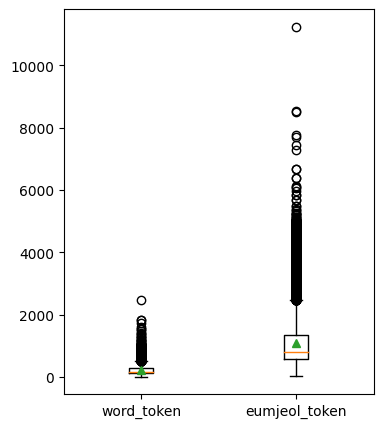

In [98]:
plt.figure(figsize = (4, 5))
plt.boxplot([tokenized_review,eumjeol_review],
            labels = ['word_token','eumjeol_token'],
            showmeans = True)

plt.show()

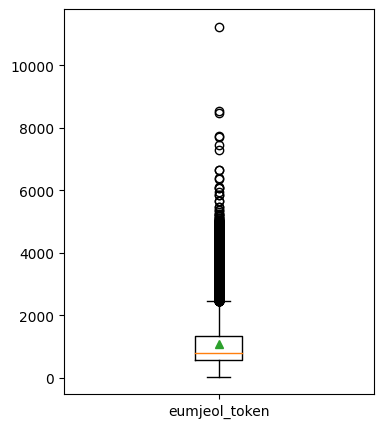

In [96]:
plt.figure(figsize = (4, 5))
plt.boxplot(eumjeol_review,
            labels = ['eumjeol_token'],
            showmeans = True)

plt.show()

In [99]:
! pip install wordcloud

In [100]:
from wordcloud import WordCloud, STOPWORDS 

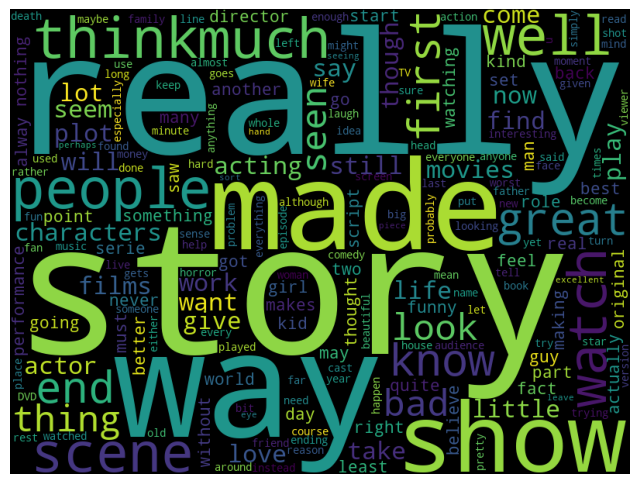

In [115]:
# len(STOPWORDS)
MY_STOPWORDS = list(STOPWORDS) + ['br', 'character', 'movie', 'film', 
                                  'make', 'one', 'see', 'time', 'even', 'good']
MY_STOPWORDS = set(MY_STOPWORDS)

x = ' '.join(review)
# len()w
word_cloud = WordCloud(stopwords=MY_STOPWORDS,
                       width = 800, height = 600).generate(x)

plt.figure(figsize=(8, 8))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()